In [24]:
##Kütüphaneleri ekledik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os

In [25]:
#Datamızı jupyter notebook içine ekledik
data=pd.read_csv('Heart_Disease_Prediction.csv')
data.head()

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [26]:
data.isnull().sum()

index                      0
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

In [27]:
data["Heart_Disease"].value_counts()

Absence     150
Presence    120
Name: Heart_Disease, dtype: int64

In [28]:
#Dataset içerisindeki Absence ve Presence verilerini işleyebilmek için 0 ve 1 olarak değiştiriyoruz.
data["Heart_Disease"]=data["Heart_Disease"].map({"Absence":0,"Presence":1})


In [29]:
data

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart_Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [30]:
#Hearth_Disease verilerini içermeyen ayrı bir data oluşturduk
data1=data.drop(["index","Heart_Disease"],axis=1)
data1

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [31]:
#VERİ SETİMİZİ EĞİTİM VE TEST OLARAK 2'YE AYIRDIK

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data1,data.Heart_Disease,test_size=0.33,random_state=0)

In [32]:
print(x_train) #veri setimizin 3'de ikisini ayırdık.

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
75    45    1                4  142          309             0            2   
194   48    1                3  124          255             1            0   
210   59    1                1  170          288             0            2   
145   53    1                4  123          282             0            0   
109   45    0                2  112          160             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
251   44    1                2  130          219             0            2   
192   54    1                2  108          309             0            0   
117   56    0                4  200          288             1            2   
47    44    1                4  110          197             0            2   
172   67    1                4  100          299             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [33]:
print(y_test)

64     0
135    0
153    0
189    1
253    0
      ..
21     0
234    0
161    1
16     1
118    0
Name: Heart_Disease, Length: 90, dtype: int64


In [34]:
#KNN MODELİ
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=18)
knn.fit(x_train,y_train)
tahmin=knn.predict(x_test)

In [35]:
print(tahmin)

[1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1]


In [36]:
print(list(y_test))

[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]


In [37]:
#test ve tahmin verilerinin karşılaştırılması.
knn.score(x_test,y_test)

0.7111111111111111

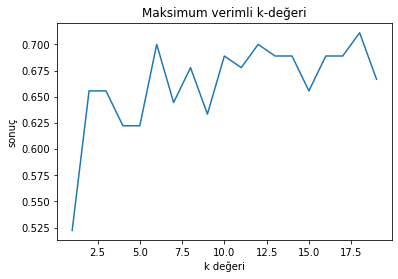

In [38]:
#Doğruluk skoru hesaplanması ve çizgi grafiğiyle görselleştirilmesi
score_list=[]

for each in range(1,20):
    knn1=KNeighborsClassifier(n_neighbors=each)
    knn1.fit(x_train,y_train)
    score_list.append(knn1.score(x_test,y_test))

plt.title("Maksimum verimli k-değeri")
plt.plot(range(1,20), score_list)
plt.xlabel("k değeri")
plt.ylabel("sonuç")
plt.show()

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tahmin))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        53
           1       0.65      0.65      0.65        37

    accuracy                           0.71        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.71      0.71      0.71        90



In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, tahmin) #karmaşıklık matrisi

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[40 13]
 [13 24]]

True Positives(TP) =  40

True Negatives(TN) =  24

False Positives(FP) =  13

False Negatives(FN) =  13


<AxesSubplot:>

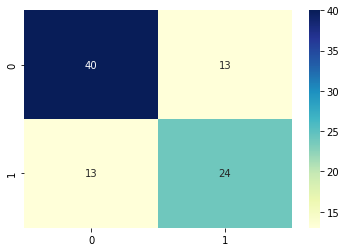

In [41]:
m_matrix= pd.DataFrame(data=cm,columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

In [42]:

precision = 40 / float(40 + 13)

print('Hassasiyet : {0:0.4f}'.format(precision))

Hassasiyet : 0.7547


In [43]:

specificity = 24 / (24 + 13)

print('Özgüllük: {0:0.4f}'.format(specificity))

Özgüllük: 0.6486


In [44]:
recall = 40 / float(40 + 13)

print('duyarlılık : {0:0.4f}'.format(recall))

duyarlılık : 0.7547


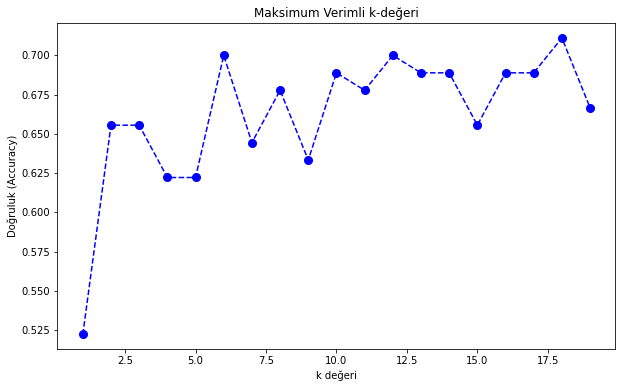

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), score_list, marker='o', linestyle='dashed', color='blue', markersize=8)
plt.title("Maksimum Verimli k-değeri")
plt.xlabel("k değeri")
plt.ylabel("Doğruluk (Accuracy)")
plt.show()


In [46]:
fpr, tpr, thresholds = roc_curve(y_test, tahmin)
roc_auc = auc(fpr, tpr)

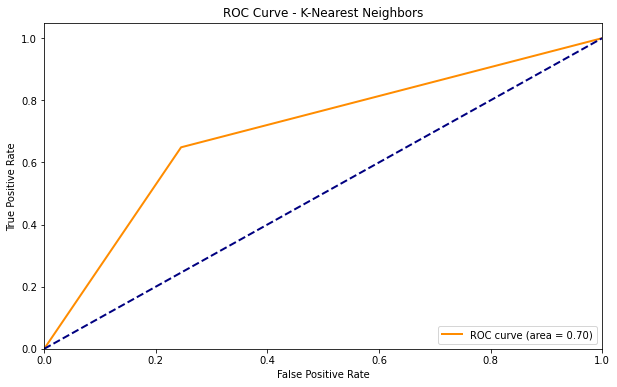

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')
plt.legend(loc='lower right')
plt.show()